<a href="https://colab.research.google.com/github/JohnDiognes/analise-perfil-eleitor-vila-velha/blob/main/notebooks/Notebook_05_analises_estatisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 05 — Análises Estatísticas Avançadas
Este notebook contém análises estatísticas sobre a base eleitoral de Vila Velha.

In [13]:
# ===============================================================
# 📘 NOTEBOOK 02 — ANÁLISE EXPLORATÓRIA DO PERFIL DO ELEITOR
# Município de Vila Velha — Eleições 2024
# ===============================================================

# ===============================================================
# 01 — CONFIGURAÇÃO INICIAL
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# -----------------------------
# Clonar o repositório (somente se não existir)
# -----------------------------
repo_nome = "analise-perfil-eleitor-vila-velha"

if not os.path.exists(repo_nome):
    !git clone https://github.com/JohnDiognes/analise-perfil-eleitor-vila-velha.git

# Caminho da base
caminho_base = f"{repo_nome}/dados/base_vila_velha.csv"

# -----------------------------
# Carregar a base
# -----------------------------
try:
    df_vv = pd.read_csv(caminho_base, encoding="utf-8")
except:
    df_vv = pd.read_csv(caminho_base, encoding="latin1")

df_vv.head()

,ano,uf,municipio,cod_municipio,zona,secao,cod_genero,genero,cod_estado_civil,estado_civil,...,interprete de libras,bairro,regiao,cod_local_votacao,local_votacao_nome,local_votacao_endereco,quant_eleitores,quant_biometria,quan_deficiencia,quant_nome_social
0,2024,ES,VILA VELHA,57037,32,266,4,FEMININO,3,CASADO,...,NÃO INFORMADO,PAUL,3,1430,UMEF GRACIANO NEVES,"R. COUTO AGUIRRE, 49",1,1,0,0
1,2024,ES,VILA VELHA,57037,32,951,4,FEMININO,3,CASADO,...,NÃO INFORMADO,ITAPOÃ,1,2070,COLÉGIO CEIC,"RUA JAIME DUARTE NASCIMENTO, 617",1,1,0,0
2,2024,ES,VILA VELHA,57037,32,936,4,FEMININO,3,CASADO,...,NÃO INFORMADO,ITAPOÃ,1,2070,COLÉGIO CEIC,"RUA JAIME DUARTE NASCIMENTO, 617",1,1,1,0
3,2024,ES,VILA VELHA,57037,57,155,4,FEMININO,1,SOLTEIRO,...,NÃO INFORMADO,SÃO TORQUATO,4,1201,UMEF JUIZ JAIRO DE MATTOS PEREIRA,"RUA PASTOR AMBROSINO BARBOSA, S/ N",1,1,0,0
4,2024,ES,VILA VELHA,57037,57,48,2,MASCULINO,3,CASADO,...,NÃO INFORMADO,COBILÂNDIA,4,1341,CEEFMTI PASTOR OLIVEIRA DE ARAUJO- ESCOLA VIVA,"AVENIDA OTÁVIO BORIN, S/N",1,1,0,0


## Estatísticas Descritivas

In [14]:
df_vv.describe(include='all')

,ano,uf,municipio,cod_municipio,zona,secao,cod_genero,genero,cod_estado_civil,estado_civil,...,interprete de libras,bairro,regiao,cod_local_votacao,local_votacao_nome,local_votacao_endereco,quant_eleitores,quant_biometria,quan_deficiencia,quant_nome_social
count,179494.0,179494,179494,179494.0,179494.000000,179494.000000,179494.000000,179494,179494.000000,179494,...,179494,179494,179494.000000,179494.000000,179494,179494,179494.000000,179494.000000,179494.000000,179494.000000
unique,NaN,1,1,NaN,NaN,NaN,NaN,3,NaN,6,...,3,59,NaN,NaN,119,119,NaN,NaN,NaN,NaN
top,NaN,ES,VILA VELHA,NaN,NaN,NaN,NaN,FEMININO,NaN,SOLTEIRO,...,NÃO INFORMADO,COQUEIRAL DE ITAPARICA,NaN,NaN,ESCOLA SEB VILA VELHA,"AV. PERIMETRAL, 200",NaN,NaN,NaN,NaN
freq,NaN,179494,179494,NaN,NaN,NaN,NaN,97999,NaN,80659,...,156320,15066,NaN,NaN,4514,4514,NaN,NaN,NaN,NaN
mean,2024.0,NaN,NaN,57037.0,48.183014,338.908532,3.091903,NaN,2.925128,NaN,...,NaN,NaN,2.520424,1430.779419,NaN,NaN,1.923340,1.769095,0.050548,0.000596
std,0.0,NaN,NaN,0.0,11.156693,227.486845,0.995860,NaN,2.489665,NaN,...,NaN,NaN,1.487295,314.241938,NaN,NaN,1.957672,1.876681,0.247335,0.024408
min,2024.0,NaN,NaN,57037.0,32.000000,1.000000,0.000000,NaN,0.000000,NaN,...,NaN,NaN,1.000000,1015.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,2024.0,NaN,NaN,57037.0,32.000000,159.000000,2.000000,NaN,1.000000,NaN,...,NaN,NaN,1.000000,1171.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000
50%,2024.0,NaN,NaN,57037.0,55.000000,300.000000,4.000000,NaN,3.000000,NaN,...,NaN,NaN,2.000000,1350.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000
75%,2024.0,NaN,NaN,57037.0,57.000000,498.000000,4.000000,NaN,3.000000,NaN,...,NaN,NaN,4.000000,1627.000000,NaN,NaN,2.000000,2.000000,0.000000,0.000000


📌 1. Medidas descritivas por região

In [15]:
df_vv.groupby("regiao")["quant_eleitores"].agg(["mean", "median", "std", "min", "max"])


,mean,median,std,min,max
regiao,,,,,
1,2.012858,1.0,2.065072,1,39
2,1.855504,1.0,1.843352,1,43
3,1.842404,1.0,1.828557,1,38
4,1.836444,1.0,1.838864,1,39
5,1.938113,1.0,2.028450,1,41


📌 2. ANOVA – diferenças entre regiões

In [16]:
dados_regioes = [grupo["quant_eleitores"].values
                 for nome, grupo in df_vv.groupby("regiao")]

anova_regioes = stats.f_oneway(*dados_regioes)
anova_regioes


F_onewayResult(statistic=np.float64(70.57901663780244), pvalue=np.float64(7.872279563007666e-60))

📌 3. Teste Qui-Quadrado — associação sexo × região

In [18]:
tabela = pd.crosstab(df_vv["genero"], df_vv["regiao"])
qui2, p, dof, exp = stats.chi2_contingency(tabela)

print("Qui-quadrado:", qui2)
print("p-valor:", p)
print("Grau de liberdade:", dof)


Qui-quadrado: 19.981319992508126
p-valor: 0.0104069547636965
Grau de liberdade: 8


📌 4. Correlação entre IDADE (faixa etária transformada) e Nº de Eleitores

In [21]:
faixas = {
    "16 anos": 16,
    "17 anos": 17,
    "18 e 19 anos": 18.5,
    "20 a 24 anos": 22,
    "25 a 29 anos": 27,
    "30 a 34 anos": 32,
    "35 a 39 anos": 37,
    "40 a 44 anos": 42,
    "45 a 49 anos": 47,
    "50 a 54 anos": 52,
    "55 a 59 anos": 57,
    "60 a 64 anos": 62,
    "65 a 69 anos": 67,
    "70 a 74 anos": 72,
    "75 a 79 anos": 77,
    "80 anos ou mais": 85
}

df_vv["idade_aprox"] = df_vv["faixa_etaria"].map(faixas)

df_vv[["idade_aprox", "quant_eleitores"]].corr()

,idade_aprox,quant_eleitores
idade_aprox,1.000000,-0.184993
quant_eleitores,-0.184993,1.000000


📌 5. Criar Índices Estatísticos

In [28]:
df_idade = df_vv.dropna(subset=['idade_aprox']).groupby("bairro").apply(
    lambda x: np.average(x["idade_aprox"], weights=x["quant_eleitores"])
).reset_index(name="idade_media_bairro")

df_idade.sort_values("idade_media_bairro", ascending=False)

TypeError: DataFrame.groupby() got an unexpected keyword argument 'include_groups'

Índice de Representatividade Feminina por região

In [29]:
df_genero = df_vv.groupby(["regiao", "genero"])[["quant_eleitores"]].sum().unstack()

# Fill NaN values (e.g., if a gender is missing in a region) with 0 for calculation
df_genero_filled = df_genero.fillna(0)

# Accessing MultiIndex columns correctly
# Calculate total eleitores for normalization within each region
total_eleitores_por_regiao = df_genero_filled['quant_eleitores'].sum(axis=1)

# Calculate percentage of feminine, handling potential division by zero
df_genero_filled["pct_feminino"] = (df_genero_filled[('quant_eleitores', 'FEMININO')] / total_eleitores_por_regiao) * 100
df_genero_filled["pct_feminino"] = df_genero_filled["pct_feminino"].fillna(0) # In case total_eleitores_por_regiao was 0

df_genero = df_genero_filled # Update df_genero to the filled version for subsequent use
df_genero.sort_values("pct_feminino", ascending=False)

quant_eleitores                         pct_feminino
genero        FEMININO MASCULINO NÃO INFORMADO             
regiao                                                     
2              28780.0   23945.0           1.0    54.584076
1              75809.0   63204.0           3.0    54.532572
5              28065.0   23483.0           0.0    54.444401
4              26861.0   23217.0           0.0    53.638324
3              27756.0   24104.0           0.0    53.521018

📌 6. Clusterização de Bairros (análise avançada)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

dados_cluster = df_vv.groupby("bairro")[["quant_eleitores"]].sum()

scaler = StandardScaler()
scaled = scaler.fit_transform(dados_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
dados_cluster["cluster"] = kmeans.fit_predict(scaled)

dados_cluster.head()


,quant_eleitores,cluster
bairro,,
ALECRIM,2576,3
ALVORADA,7688,2
ARAÇÁS,6409,0
ARGOLAS,2292,3
ARIBIRI,9635,2


## Distribuição de Idades

## Correlação entre Variáveis Numéricas

In [9]:
corr = df_vv.corr(numeric_only=True)
corr

,ano,cod_municipio,zona,secao,cod_genero,cod_estado_civil,cod_escolaridade,cod_faixa_etaria,cod_raca,cod_identidade_genero,cod_quilombola,cod_interprete de libras,regiao,cod_local_votacao,quant_eleitores,quant_biometria,quan_deficiencia,quant_nome_social
ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_municipio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zona,NaN,NaN,1.000000,-0.425979,-0.005814,-0.009800,-0.125149,-0.048005,0.025517,0.025428,0.014995,0.014682,0.415947,-0.297053,-0.014340,-0.016832,-0.009910,0.003159
secao,NaN,NaN,-0.425979,1.000000,0.005624,0.002904,0.083262,-0.021925,0.040301,0.041479,0.048045,0.048080,-0.163184,0.732373,0.058281,0.053262,0.004000,0.003856
cod_genero,NaN,NaN,-0.005814,0.005624,1.000000,0.083964,0.014552,0.044422,-0.011408,-0.009796,-0.009752,-0.009799,-0.009140,0.001890,-0.006920,-0.001243,0.007581,-0.000191
cod_estado_civil,NaN,NaN,-0.009800,0.002904,0.083964,1.000000,0.042864,0.379708,-0.098002,-0.096511,-0.100323,-0.100194,-0.043952,0.000450,-0.158101,-0.122523,0.045647,-0.012101
cod_escolaridade,NaN,NaN,-0.125149,0.083262,0.014552,0.042864,1.000000,-0.159041,0.023329,0.030626,0.042556,0.042580,-0.259621,0.056863,0.146269,0.151198,-0.071372,0.001038
cod_faixa_etaria,NaN,NaN,-0.048005,-0.021925,0.044422,0.379708,-0.159041,1.000000,-0.269915,-0.266722,-0.279733,-0.279235,-0.076146,-0.019357,-0.160415,-0.085971,0.215848,-0.024252
cod_raca,NaN,NaN,0.025517,0.040301,-0.011408,-0.098002,0.023329,-0.269915,1.000000,0.910925,0.954164,0.953158,0.034638,0.045194,-0.160117,-0.153796,-0.035911,0.008970
cod_identidade_genero,NaN,NaN,0.025428,0.041479,-0.009796,-0.096511,0.030626,-0.266722,0.910925,1.000000,0.943283,0.941958,0.025554,0.044949,-0.159673,-0.154668,-0.036886,0.012182


### Heatmap

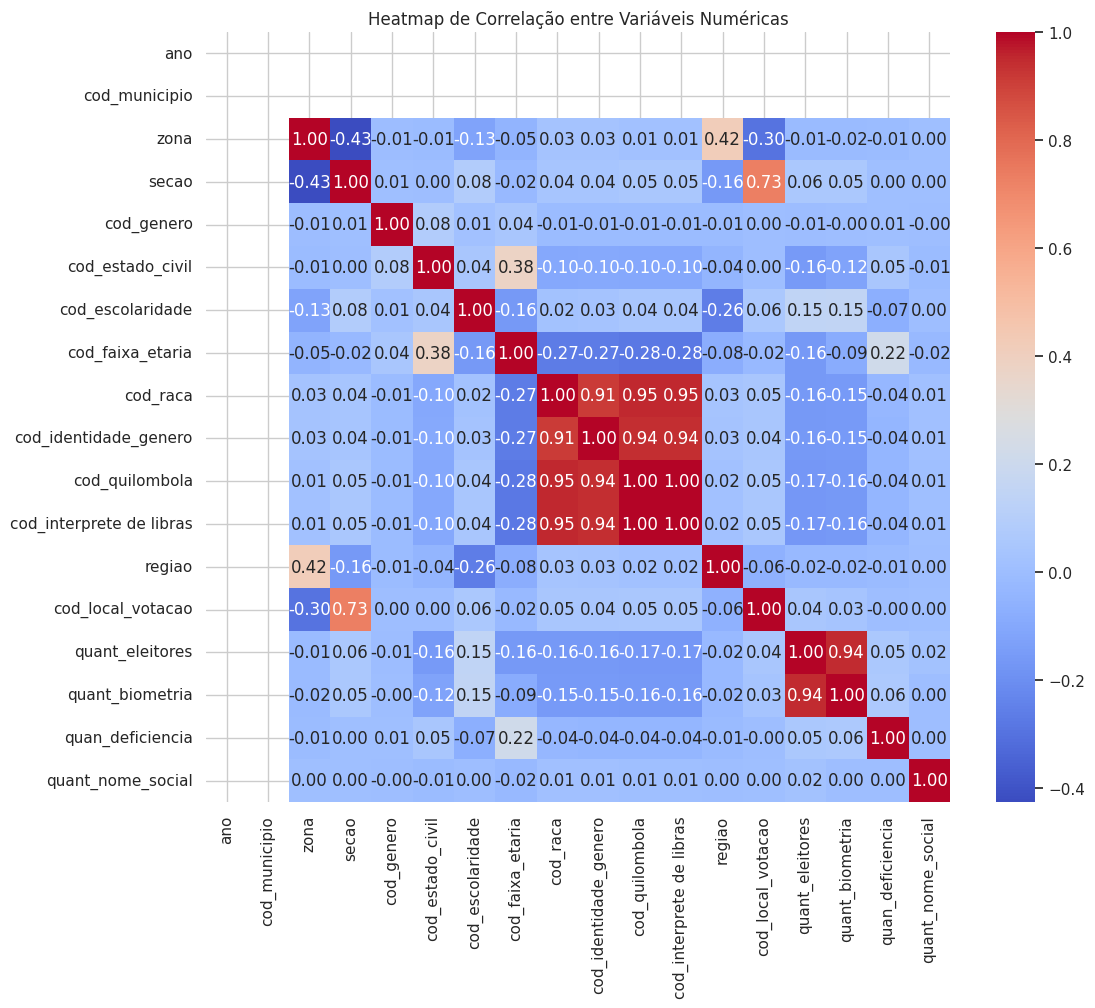

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de Correlação entre Variáveis Numéricas")
plt.show()

In [ ]:
df_idade = df_vv.dropna(subset=['idade_aprox']).groupby("bairro").apply(
    lambda x: np.average(x["idade_aprox"], weights=x["quant_eleitores"])
).reset_index(name="idade_media_bairro")

df_idade.sort_values("idade_media_bairro", ascending=False)

In [ ]:
df_genero = df_vv.groupby(["regiao", "genero"])[["quant_eleitores"]].sum().unstack()

# Fill NaN values (e.g., if a gender is missing in a region) with 0 for calculation
df_genero_filled = df_genero.fillna(0)

# Accessing MultiIndex columns correctly
# Calculate total eleitores for normalization within each region
total_eleitores_por_regiao = df_genero_filled['quant_eleitores'].sum(axis=1)

# Calculate percentage of feminine, handling potential division by zero
df_genero_filled["pct_feminino"] = (df_genero_filled[('quant_eleitores', 'FEMININO')] / total_eleitores_por_regiao) * 100
df_genero_filled["pct_feminino"] = df_genero_filled["pct_feminino"].fillna(0) # In case total_eleitores_por_regiao was 0

df_genero = df_genero_filled # Update df_genero to the filled version for subsequent use
df_genero.sort_values("pct_feminino", ascending=False)

In [ ]:
# 1. Box Plot para quant_eleitores por regiao
plt.figure(figsize=(10, 6))
sns.boxplot(x='regiao', y='quant_eleitores', data=df_vv)
plt.title('Distribuição de Eleitores por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Eleitores')
plt.show()

# 2. Gráfico de Barras Empilhadas para genero x regiao
tabela = pd.crosstab(df_vv['genero'], df_vv['regiao'])
tabela.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Associação entre Gênero e Região')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Eleitores')
plt.xticks(rotation=0)
plt.show()

# 3. Gráfico de Dispersão para idade_aprox vs quant_eleitores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade_aprox', y='quant_eleitores', data=df_vv)
plt.title('Correlação entre Idade Aproximada e Quantidade de Eleitores')
plt.xlabel('Idade Aproximada')
plt.ylabel('Quantidade de Eleitores')
plt.show()

In [ ]:
df_idade = df_vv.dropna(subset=['idade_aprox']).groupby("bairro").apply(
    lambda x: np.average(x["idade_aprox"], weights=x["quant_eleitores"])
).reset_index(name="idade_media_bairro")

df_idade.sort_values("idade_media_bairro", ascending=False)

In [ ]:
df_genero = df_vv.groupby(["regiao", "genero"])[["quant_eleitores"]].sum().unstack()

# Fill NaN values (e.g., if a gender is missing in a region) with 0 for calculation
df_genero_filled = df_genero.fillna(0)

# Accessing MultiIndex columns correctly
# Calculate total eleitores for normalization within each region
total_eleitores_por_regiao = df_genero_filled['quant_eleitores'].sum(axis=1)

# Calculate percentage of feminine, handling potential division by zero
df_genero_filled["pct_feminino"] = (df_genero_filled[('quant_eleitores', 'FEMININO')] / total_eleitores_por_regiao) * 100
df_genero_filled["pct_feminino"] = df_genero_filled["pct_feminino"].fillna(0) # In case total_eleitores_por_regiao was 0

df_genero = df_genero_filled # Update df_genero to the filled version for subsequent use
df_genero.sort_values("pct_feminino", ascending=False)

In [ ]:
# 1. Box Plot para quant_eleitores por regiao
plt.figure(figsize=(10, 6))
sns.boxplot(x='regiao', y='quant_eleitores', data=df_vv)
plt.title('Distribuição de Eleitores por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Eleitores')
plt.show()

# 2. Gráfico de Barras Empilhadas para genero x regiao
tabela = pd.crosstab(df_vv['genero'], df_vv['regiao'])
tabela.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Associação entre Gênero e Região')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Eleitores')
plt.xticks(rotation=0)
plt.show()

# 3. Gráfico de Dispersão para idade_aprox vs quant_eleitores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade_aprox', y='quant_eleitores', data=df_vv)
plt.title('Correlação entre Idade Aproximada e Quantidade de Eleitores')
plt.xlabel('Idade Aproximada')
plt.ylabel('Quantidade de Eleitores')
plt.show()

In [ ]:
df_idade = df_vv.dropna(subset=['idade_aprox']).groupby("bairro").apply(
    lambda x: np.average(x["idade_aprox"], weights=x["quant_eleitores"])
).reset_index(name="idade_media_bairro")

df_idade.sort_values("idade_media_bairro", ascending=False)

In [ ]:
df_genero = df_vv.groupby(["regiao", "genero"])[["quant_eleitores"]].sum().unstack()

# Fill NaN values (e.g., if a gender is missing in a region) with 0 for calculation
df_genero_filled = df_genero.fillna(0)

# Accessing MultiIndex columns correctly
# Calculate total eleitores for normalization within each region
total_eleitores_por_regiao = df_genero_filled['quant_eleitores'].sum(axis=1)

# Calculate percentage of feminine, handling potential division by zero
df_genero_filled["pct_feminino"] = (df_genero_filled[('quant_eleitores', 'FEMININO')] / total_eleitores_por_regiao) * 100
df_genero_filled["pct_feminino"] = df_genero_filled["pct_feminino"].fillna(0) # In case total_eleitores_por_regiao was 0

df_genero = df_genero_filled # Update df_genero to the filled version for subsequent use
df_genero.sort_values("pct_feminino", ascending=False)

In [ ]:
# 1. Box Plot para quant_eleitores por regiao
plt.figure(figsize=(10, 6))
sns.boxplot(x='regiao', y='quant_eleitores', data=df_vv)
plt.title('Distribuição de Eleitores por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Eleitores')
plt.show()

# 2. Gráfico de Barras Empilhadas para genero x regiao
tabela = pd.crosstab(df_vv['genero'], df_vv['regiao'])
tabela.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Associação entre Gênero e Região')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Eleitores')
plt.xticks(rotation=0)
plt.show()

# 3. Gráfico de Dispersão para idade_aprox vs quant_eleitores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade_aprox', y='quant_eleitores', data=df_vv)
plt.title('Correlação entre Idade Aproximada e Quantidade de Eleitores')
plt.xlabel('Idade Aproximada')
plt.ylabel('Quantidade de Eleitores')
plt.show()

In [ ]:
df_idade = df_vv.dropna(subset=['idade_aprox']).groupby("bairro").apply(
    lambda x: np.average(x["idade_aprox"], weights=x["quant_eleitores"])
).reset_index(name="idade_media_bairro")

df_idade.sort_values("idade_media_bairro", ascending=False)

In [ ]:
df_genero = df_vv.groupby(["regiao", "genero"])[["quant_eleitores"]].sum().unstack()

# Fill NaN values (e.g., if a gender is missing in a region) with 0 for calculation
df_genero_filled = df_genero.fillna(0)

# Accessing MultiIndex columns correctly
# Calculate total eleitores for normalization within each region
total_eleitores_por_regiao = df_genero_filled['quant_eleitores'].sum(axis=1)

# Calculate percentage of feminine, handling potential division by zero
df_genero_filled["pct_feminino"] = (df_genero_filled[('quant_eleitores', 'FEMININO')] / total_eleitores_por_regiao) * 100
df_genero_filled["pct_feminino"] = df_genero_filled["pct_feminino"].fillna(0) # In case total_eleitores_por_regiao was 0

df_genero = df_genero_filled # Update df_genero to the filled version for subsequent use
df_genero.sort_values("pct_feminino", ascending=False)

In [ ]:
# 1. Box Plot para quant_eleitores por regiao
plt.figure(figsize=(10, 6))
sns.boxplot(x='regiao', y='quant_eleitores', data=df_vv)
plt.title('Distribuição de Eleitores por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Eleitores')
plt.show()

# 2. Gráfico de Barras Empilhadas para genero x regiao
tabela = pd.crosstab(df_vv['genero'], df_vv['regiao'])
tabela.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Associação entre Gênero e Região')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Eleitores')
plt.xticks(rotation=0)
plt.show()

# 3. Gráfico de Dispersão para idade_aprox vs quant_eleitores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade_aprox', y='quant_eleitores', data=df_vv)
plt.title('Correlação entre Idade Aproximada e Quantidade de Eleitores')
plt.xlabel('Idade Aproximada')
plt.ylabel('Quantidade de Eleitores')
plt.show()

In [30]:
df_idade = df_vv.dropna(subset=['idade_aprox']).groupby("bairro").apply(
    lambda x: np.average(x["idade_aprox"], weights=x["quant_eleitores"])
).reset_index(name="idade_media_bairro")

df_idade.sort_values("idade_media_bairro", ascending=False)

TypeError: DataFrame.groupby() got an unexpected keyword argument 'include_groups'

In [31]:
df_genero = df_vv.groupby(["regiao", "genero"])[["quant_eleitores"]].sum().unstack()

# Fill NaN values (e.g., if a gender is missing in a region) with 0 for calculation
df_genero_filled = df_genero.fillna(0)

# Accessing MultiIndex columns correctly
# Calculate total eleitores for normalization within each region
total_eleitores_por_regiao = df_genero_filled['quant_eleitores'].sum(axis=1)

# Calculate percentage of feminine, handling potential division by zero
df_genero_filled["pct_feminino"] = (df_genero_filled[('quant_eleitores', 'FEMININO')] / total_eleitores_por_regiao) * 100
df_genero_filled["pct_feminino"] = df_genero_filled["pct_feminino"].fillna(0) # In case total_eleitores_por_regiao was 0

df_genero = df_genero_filled # Update df_genero to the filled version for subsequent use
df_genero.sort_values("pct_feminino", ascending=False)

quant_eleitores                         pct_feminino
genero        FEMININO MASCULINO NÃO INFORMADO             
regiao                                                     
2              28780.0   23945.0           1.0    54.584076
1              75809.0   63204.0           3.0    54.532572
5              28065.0   23483.0           0.0    54.444401
4              26861.0   23217.0           0.0    53.638324
3              27756.0   24104.0           0.0    53.521018

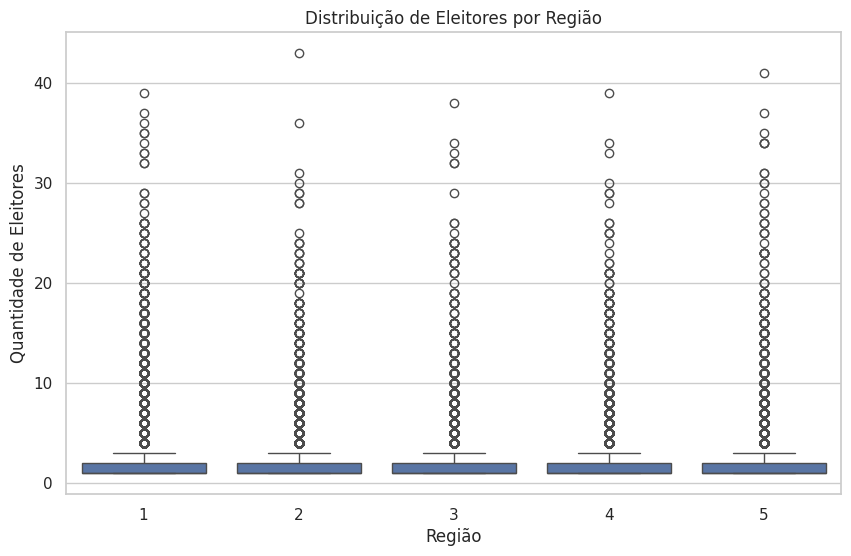

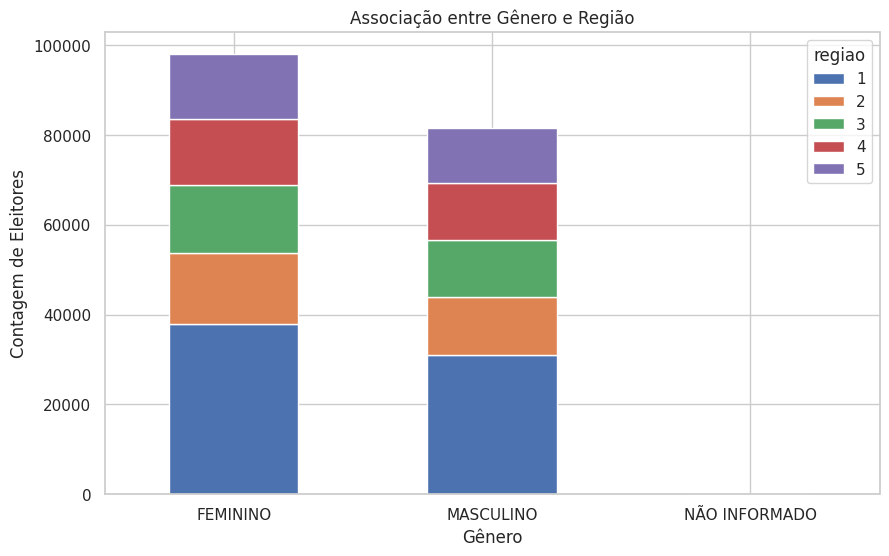

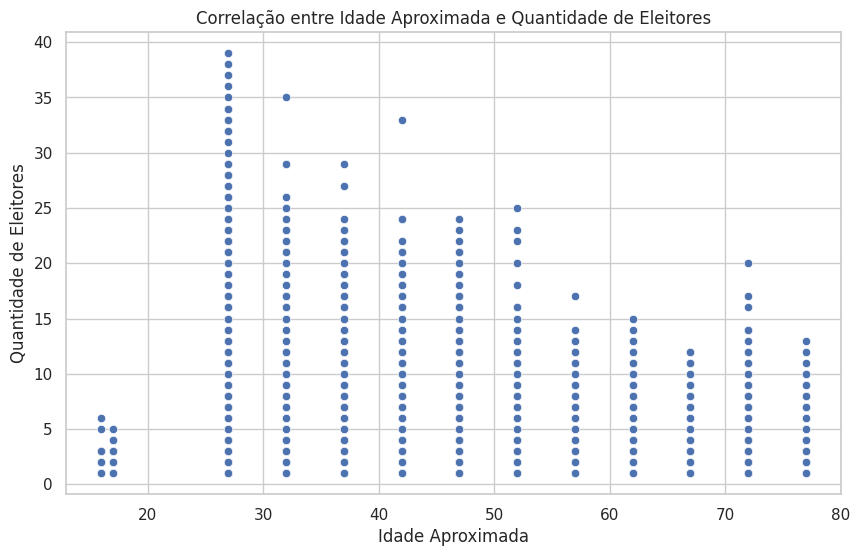

In [32]:
# 1. Box Plot para quant_eleitores por regiao
plt.figure(figsize=(10, 6))
sns.boxplot(x='regiao', y='quant_eleitores', data=df_vv)
plt.title('Distribuição de Eleitores por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Eleitores')
plt.show()

# 2. Gráfico de Barras Empilhadas para genero x regiao
tabela = pd.crosstab(df_vv['genero'], df_vv['regiao'])
tabela.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Associação entre Gênero e Região')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Eleitores')
plt.xticks(rotation=0)
plt.show()

# 3. Gráfico de Dispersão para idade_aprox vs quant_eleitores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade_aprox', y='quant_eleitores', data=df_vv)
plt.title('Correlação entre Idade Aproximada e Quantidade de Eleitores')
plt.xlabel('Idade Aproximada')
plt.ylabel('Quantidade de Eleitores')
plt.show()

In [33]:
df_idade = df_vv.dropna(subset=['idade_aprox']).groupby("bairro").apply(
    lambda x: np.average(x["idade_aprox"], weights=x["quant_eleitores"])
).reset_index(name="idade_media_bairro")

df_idade.sort_values("idade_media_bairro", ascending=False)

TypeError: DataFrame.groupby() got an unexpected keyword argument 'include_groups'

In [34]:
df_genero = df_vv.groupby(["regiao", "genero"])[["quant_eleitores"]].sum().unstack()

# Fill NaN values (e.g., if a gender is missing in a region) with 0 for calculation
df_genero_filled = df_genero.fillna(0)

# Accessing MultiIndex columns correctly
# Calculate total eleitores for normalization within each region
total_eleitores_por_regiao = df_genero_filled['quant_eleitores'].sum(axis=1)

# Calculate percentage of feminine, handling potential division by zero
df_genero_filled["pct_feminino"] = (df_genero_filled[('quant_eleitores', 'FEMININO')] / total_eleitores_por_regiao) * 100
df_genero_filled["pct_feminino"] = df_genero_filled["pct_feminino"].fillna(0) # In case total_eleitores_por_regiao was 0

df_genero = df_genero_filled # Update df_genero to the filled version for subsequent use
df_genero.sort_values("pct_feminino", ascending=False)

quant_eleitores                         pct_feminino
genero        FEMININO MASCULINO NÃO INFORMADO             
regiao                                                     
2              28780.0   23945.0           1.0    54.584076
1              75809.0   63204.0           3.0    54.532572
5              28065.0   23483.0           0.0    54.444401
4              26861.0   23217.0           0.0    53.638324
3              27756.0   24104.0           0.0    53.521018

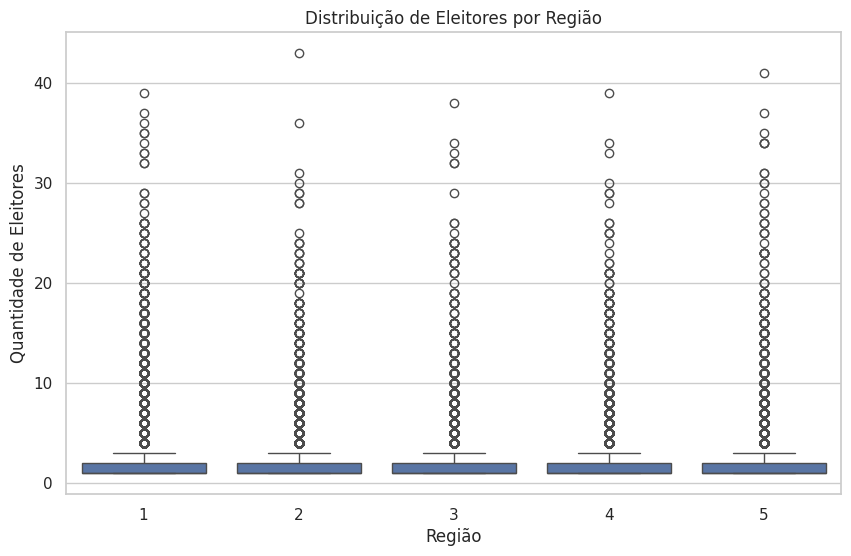

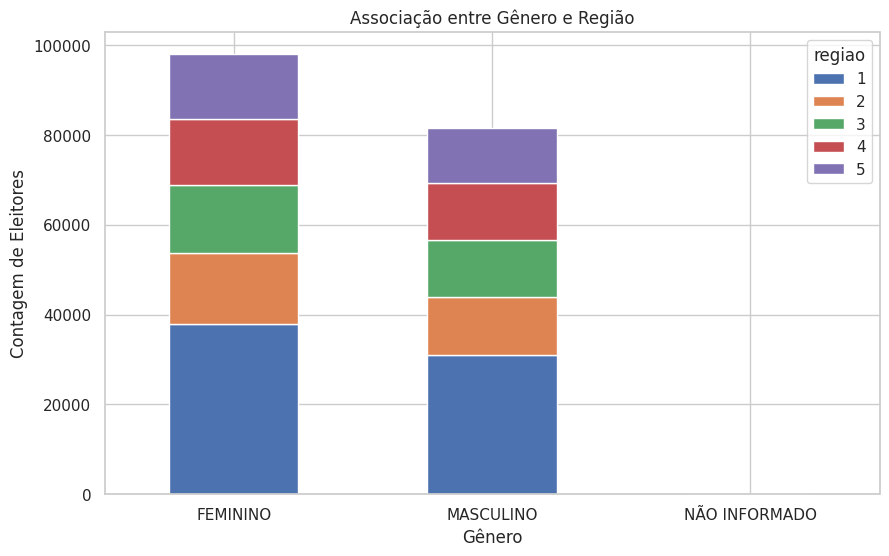

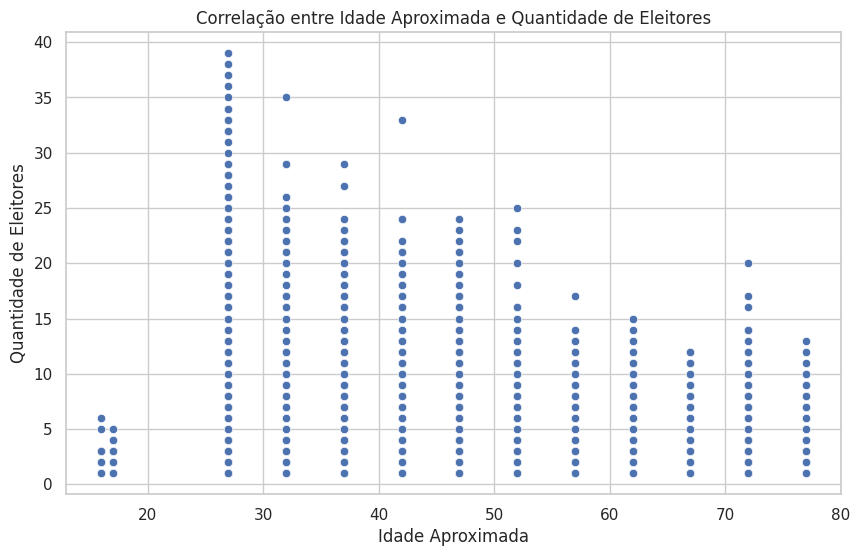

In [35]:
# 1. Box Plot para quant_eleitores por regiao
plt.figure(figsize=(10, 6))
sns.boxplot(x='regiao', y='quant_eleitores', data=df_vv)
plt.title('Distribuição de Eleitores por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Eleitores')
plt.show()

# 2. Gráfico de Barras Empilhadas para genero x regiao
tabela = pd.crosstab(df_vv['genero'], df_vv['regiao'])
tabela.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Associação entre Gênero e Região')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Eleitores')
plt.xticks(rotation=0)
plt.show()

# 3. Gráfico de Dispersão para idade_aprox vs quant_eleitores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade_aprox', y='quant_eleitores', data=df_vv)
plt.title('Correlação entre Idade Aproximada e Quantidade de Eleitores')
plt.xlabel('Idade Aproximada')
plt.ylabel('Quantidade de Eleitores')
plt.show()